In [1]:
%pip install scikit-learn numpy matplotlib scipy


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier



In [3]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [4]:
def scale_data(X_tr: np.array, X_te: np.array) -> tuple[np.array, np.array]:
    scaler = StandardScaler()
    scaler.fit(X_tr)
    
    X_tr_scaled = scaler.transform(X_tr)
    X_te_scaled = scaler.transform(X_te)
    
    return X_tr_scaled, X_te_scaled

X_tr_scaled, X_te_scaled = scale_data(X_train, X_test)

### Experiment: Error as a function of training data size

In [5]:
def errors_for_train_sizes_mlp(X_tr: np.array, y_tr: np.array, X_te: np.array, y_te: np.array, train_sizes: list[int]) -> tuple[list, list, list, list]:
    tr_err_mlp = []
    te_err_mlp = []

    for size in train_sizes:
        mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='sgd', batch_size=256, learning_rate='constant', learning_rate_init=0.001)
        print(f"Training MLP on size {size}...")
        mlp.fit(X_tr[:size], y_tr[:size])
        print("Making predictions and calculating errors...")
        tr_error = 1 - mlp.score(X_tr[:size], y_tr[:size])
        te_error = 1 - mlp.score(X_te, y_te)
        
        print(f"Training error: {tr_error}. Testing error: {te_error}")
        tr_err_mlp.append(tr_error)
        te_err_mlp.append(te_error)
    
    return tr_err_mlp, te_err_mlp 

In [5]:
def plot_errors_for_train_sizes_mlp_lr(tr_err_mlp: list, te_err_mlp: list, train_sizes: list[int]) -> None:
    plt.semilogx(train_sizes, tr_err_mlp, label='MLP Training error')
    plt.semilogx(train_sizes, te_err_mlp, label='MLP Testing error')

    plt.xlabel('Num. Training Data Points')
    plt.ylabel('Error Rate')

    plt.legend();

Training MLP on size 50...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.0. Testing error: 0.4195
Training MLP on size 500...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.040000000000000036. Testing error: 0.23609999999999998
Training MLP on size 2000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.052000000000000046. Testing error: 0.18520000000000003
Training MLP on size 5000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.053200000000000025. Testing error: 0.16979999999999995
Training MLP on size 10000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.055499999999999994. Testing error: 0.14739999999999998
Training MLP on size 20000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.05415000000000003. Testing error: 0.13770000000000004
Training MLP on size 40000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.05752500000000005. Testing error: 0.1269
Training MLP on size 60000...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Making predictions and calculating errors...
Training error: 0.054916666666666614. Testing error: 0.12060000000000004


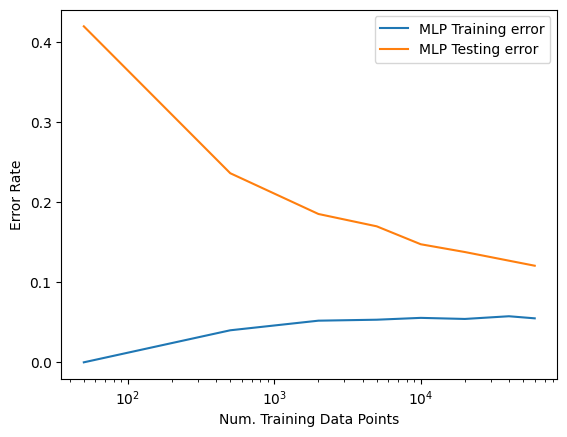

In [6]:
train_sizes = [50, 500, 2000, 5000, 10000, 20000, 40000, 60000]
tr_err_mlp, te_err_mlp = errors_for_train_sizes_mlp(X_tr_scaled, y_train, X_te_scaled, y_test, train_sizes)
plot_errors_for_train_sizes_mlp_lr(tr_err_mlp, te_err_mlp, train_sizes)

### Experiment: Error as a function of learning rate

In [6]:
# Validation set of 10,000 images
X_val_10k = X_tr_scaled[:10000]
y_val_10k = y_train[:10000]

# Training set of 70,000 images
X_tr_50k = X_tr_scaled[10000:]
y_tr_50k = y_train[10000:]

In [8]:
def errors_for_learning_rates_mlp(X_tr: np.array, y_tr: np.array, learning_rates: list[float]) -> list[list]:
    err_curves = [] # append loss_curve_ from each MLP model to this list
    for lr in learning_rates:
        mlp = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', solver='sgd', batch_size=400, n_iter_no_change=100, max_iter=100, learning_rate='adaptive', learning_rate_init=lr)
        mlp.fit(X_tr, y_tr)
        err_curves.append(mlp.loss_curve_)
    return err_curves 

In [7]:
def plot_errors_for_learning_rates_mlp(err_curves: list[list], learning_rates: list[float]) -> None:
    for i, curve in enumerate(err_curves):
        print(len(curve))
        plt.plot(np.linspace(0, 100, len(curve)), curve, label=f"α=({learning_rates[i]})")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend();

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

100
100
100
100
100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


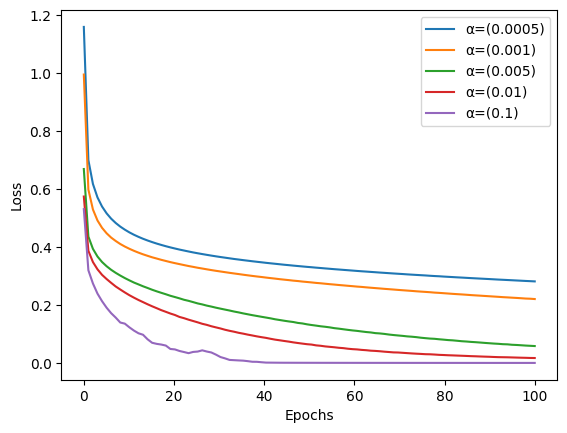

In [19]:
learning_rates = [0.0005, 0.001, 0.005, 0.01, 0.1]
err_curves = errors_for_learning_rates_mlp(X_tr_50k, y_tr_50k, learning_rates)
plot_errors_for_learning_rates_mlp(err_curves, learning_rates)

### Hyperparameter Tuning

In [12]:
# Define hyperparameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(128,), (256,), (512,)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.01],
    'max_iter': [100],
    'n_iter_no_change': [100],
    'batch_size': [200, 400, 600],
    'alpha': [0.001, 0.01]  # regularization strength (L2 penalty)
}

# Create base MLPClassifier
base_mlp = MLPClassifier(
    # n_iter_no_change=100,  # early stopping patience
    random_state=1234        # for reproducibility
)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=base_mlp,
    param_grid=param_grid,
    cv=3,                  # 3-fold cross validation
    scoring='accuracy',    # metric to optimize
    n_jobs=-1,            # use all available cores
    verbose=2             # show progress
)



In [13]:
# Fit grid search (commented out since we'll run it in next cell)
grid_search.fit(X_tr_scaled, y_train)

# Print best parameters and score (commented out since we'll run it after fitting)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 8.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 9.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 9.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=14.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=14.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.4min
[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=15.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 6.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=17.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 3.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=18.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.4min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=200, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=14.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=10.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 4.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=10.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=400, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=10.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 3.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 3.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 3.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 8.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 8.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.001, batch_size=600, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 8.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 6.7min
[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 6.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 6.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 3.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 5.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=12.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 2.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(128,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 3.2min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=14.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=200, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=13.8min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=12.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 7.1min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=12.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 6.9min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(256,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 6.0min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=400, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time=11.7min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 7.6min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 7.3min


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.01, batch_size=600, hidden_layer_sizes=(512,), learning_rate=adaptive, learning_rate_init=0.01, max_iter=100, n_iter_no_change=100, solver=sgd; total time= 4.0min
Best parameters: {'activation': 'relu', 'alpha': 0.01, 'batch_size': 400, 'hidden_layer_sizes': (512,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 100, 'n_iter_no_change': 100, 'solver': 'sgd'}
Best cross-validation score: 0.89335


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

final_mlp = MLPClassifier(hidden_layer_sizes=(512,), activation='relu', solver='sgd', batch_size=400, n_iter_no_change=100, max_iter=100, learning_rate='adaptive', learning_rate_init=0.1)
final_mlp.fit(X_tr_scaled, y_train)

y_pred = final_mlp.predict(X_te_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy: 0.8964
Confusion Matrix: [[832   3  17  17   3   0 120   0   8   0]
 [  5 980   0   8   3   0   1   0   3   0]
 [ 20   1 833  12  67   1  62   0   4   0]
 [ 21  10  10 889  35   0  29   0   6   0]
 [  0   0  74  27 840   1  55   0   3   0]
 [  0   0   0   1   0 971   0  13   2  13]
 [107   1  75  23  63   0 722   0   9   0]
 [  0   0   0   0   0   9   0 967   0  24]
 [  5   0   4   5   3   2   8   4 969   0]
 [  0   0   0   0   0   8   1  30   0 961]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.83      0.83      1000
           3       0.91      0.89      0.90      1000
           4       0.83      0.84      0.83      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.72      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.97 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
%pip install seaborn

Python(10147) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


     |████████████████████████████████| 294 kB 5.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


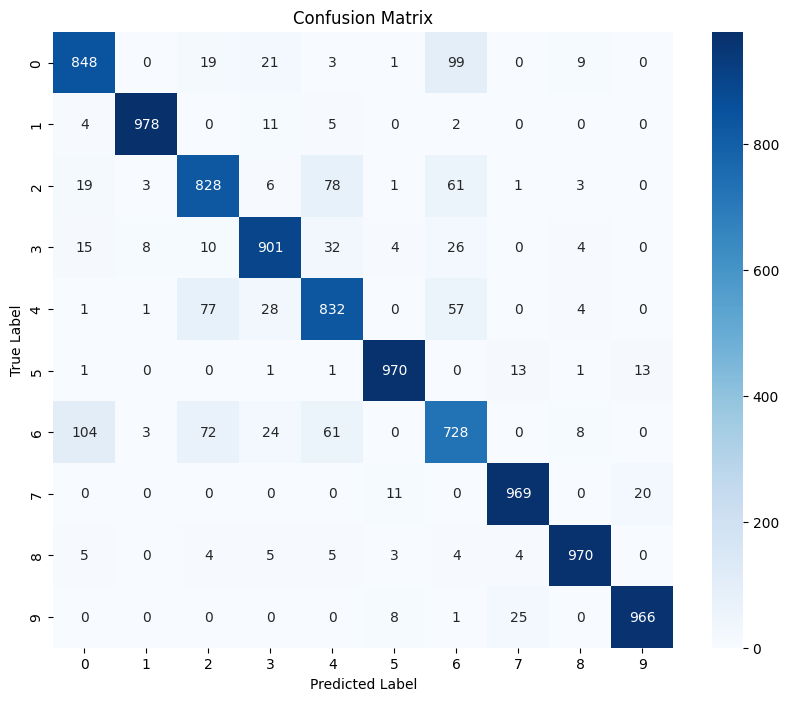

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix plot
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Create confusion matrix and and summary report

In [10]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# print(type(cm))
# Get unique labels
labels = np.unique(y_test)

# Find significant mismatches (where off-diagonal elements are > 5% of total samples)
total_samples = len(y_test)

# Print mismatches that exceed threshold
print("Significant misclassification pairs (true label -> predicted label):")
print("Format: (true label, predicted label): number of misclassifications")
print("-" * 60)
# print(threshold)
threshold = 50

for i in range(len(labels)):
    for j in range(len(labels)):
        if i != j and cm[i,j] > threshold:  # Only look at off-diagonal elements
            print(f"({labels[i]} -> {labels[j]}): {cm[i,j]} misclassifications")


Significant misclassification pairs (true label -> predicted label):
Format: (true label, predicted label): number of misclassifications
------------------------------------------------------------
(0 -> 6): 120 misclassifications
(2 -> 4): 67 misclassifications
(2 -> 6): 62 misclassifications
(4 -> 2): 74 misclassifications
(4 -> 6): 55 misclassifications
(6 -> 0): 107 misclassifications
(6 -> 2): 75 misclassifications
(6 -> 4): 63 misclassifications


In [11]:
y_pred = final_mlp.predict(X_te_scaled)
# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]

# Save misclassified images and their info
np.savez('misclassified_images.npz',
         images=X_test[misclassified_idx],
         true_labels=y_test[misclassified_idx],
         pred_labels=y_pred[misclassified_idx],
         indices=misclassified_idx)

print(f"Saved {len(misclassified_idx)} misclassified images to 'misclassified_images.npz'.")

# Optionally, save a few sample images for quick inspection
import os
os.makedirs('misclassified_samples', exist_ok=True)
for i, idx in enumerate(misclassified_idx[:20]):
    img = X_test[idx].reshape(28, 28)
    plt.imsave(f'misclassified_samples/img_{i}_true_{y_test[idx]}_pred_{y_pred[idx]}.png', img, cmap='gray') 
    


Saved 1036 misclassified images to 'misclassified_images.npz'.
